In [1]:
import pandas_datareader as data
import pandas as pd
from datetime import datetime

In [2]:
start = '2010-01-01'
end = '2022-01-01'
#end = datetime.today().strftime("%Y-%m-%d")

df = data.DataReader('SBIN.NS','yahoo',start,end)
df = df.reset_index()
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
2956,2021-12-27,460.500000,450.549988,453.700012,458.049988,8856482.0,458.049988
2957,2021-12-28,462.899994,459.049988,461.200012,461.200012,8832210.0,461.200012
2958,2021-12-29,462.149994,451.399994,461.000000,454.399994,11757303.0,454.399994
2959,2021-12-30,454.899994,448.500000,452.750000,451.700012,28879190.0,451.700012
2960,2021-12-31,461.399994,453.100006,454.250000,460.450012,10005842.0,460.450012


In [3]:
#df.to_csv('stock.csv')
#df = pd.read_csv('stock.csv')
df1 = df.reset_index()['Close']

In [4]:
import matplotlib.pyplot as plt

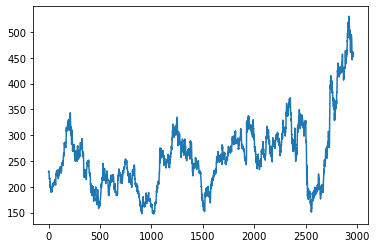

In [5]:
plt.plot(df1)

In [6]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [7]:
train_data, test_data = df1[0:int(len(df1)*0.70),:], df1[int(len(df1)*0.70):len(df1),:1]

In [8]:
import numpy

In [9]:
def create_dataset(dataset, time_step=1):
    dataX,dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

In [10]:
time_step=100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data,time_step)

In [11]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [13]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer='adam')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
31/31 [==============================] - 6s 116ms/step - loss: 0.0084 - val_loss: 0.0154
Epoch 2/50
31/31 [==============================] - 3s 81ms/step - loss: 0.0015 - val_loss: 0.0040
Epoch 3/50
31/31 [==============================] - 3s 83ms/step - loss: 0.0012 - val_loss: 0.0032
Epoch 4/50
31/31 [==============================] - 3s 81ms/step - loss: 0.0011 - val_loss: 0.0028
Epoch 5/50
31/31 [==============================] - 3s 82ms/step - loss: 9.8852e-04 - val_loss: 0.0024
Epoch 6/50
31/31 [==============================] - 3s 82ms/step - loss: 9.3513e-04 - val_loss: 0.0029
Epoch 7/50
31/31 [==============================] - 3s 82ms/step - loss: 9.4022e-04 - val_loss: 0.0022
Epoch 8/50
31/31 [==============================] - 3s 81ms/step - loss: 8.7491e-04 - val_loss: 0.0022
Epoch 9/50
31/31 [==============================] - 3s 83ms/step - loss: 8.0370e-04 - val_loss: 0.0022
Epoch 10/50
31/31 [==============================] - 3s 82ms/step - loss: 8.1108e-04 - v

In [16]:
model.save('new_model.h5')

In [2]:
import tensorflow as tf


In [3]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

NameError: name 'model' is not defined

In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

In [ ]:
loopback = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[loopback:len(train_predict)+loopback,:] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(train_predict)+(loopback*2)+1:len(df1)-1,:] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
from numpy import array
lst_output=[]
n_steps=100
i=0
npt = int(input("How many days of data to predict?"))
while(i<npt):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
day_new = np.arange(1,101)
day_pred = np.arange(101,101+npt)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df3 = df1.tolist()
df3.extend(lst_output)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [2]:
!pip install yfinance

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=b0a0d76796b84888d0044409c0549f276b108a4cede15354e177056e490b8384
  Stored in directory: c:\users\vibod\appdata\local\pip\cache\wheels\f2\b5\2c\59ba95dcf854e542944c75fe3da584e4e3833b319735a0546c
Successfully built multitasking


You should consider upgrading via the 'C:\Users\vibod\anaconda3\python.exe -m pip install --upgrade pip' command.


In [46]:
import yfinance as yf
'''stock = yf.Ticker("RUCHI.NS")'''
str(yf.Ticker("RUCHI.NS").history(period='max').reset_index()['Date'][0])[:10]

'2002-07-01'

In [13]:
stock.history(period='max')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-07-01,709.278014,714.597599,691.546064,710.164612,76,0.0,0.0
2002-07-02,762.473799,781.978943,716.370732,781.978943,210,0.0,0.0
2002-07-03,798.824434,830.741947,762.473932,767.793518,101,0.0,0.0
2002-07-04,762.473815,815.669663,755.381035,763.360413,74,0.0,0.0
2002-07-05,771.339740,789.071688,727.009870,749.174805,50,0.0,0.0
...,...,...,...,...,...,...,...
2022-04-07,770.000000,839.900024,770.000000,817.700012,12081878,0.0,0.0
2022-04-08,855.000000,938.700012,825.750000,923.450012,40371923,0.0,0.0
2022-04-11,969.000000,999.450012,903.599976,919.200012,21787383,0.0,0.0
